In [3]:
import torch
from torch import nn 
import torch.nn.functional as F
from torch import Tensor

In [57]:
import os
os.chdir('../')

In [30]:
torch.nn.init.uniform_(torch.empty(32),0.,0.4)

tensor([0.3897, 0.2205, 0.3415, 0.0806, 0.2223, 0.2236, 0.1547, 0.2344, 0.1233,
        0.1052, 0.1783, 0.2052, 0.3786, 0.3620, 0.2607, 0.0887, 0.3784, 0.0789,
        0.2050, 0.0425, 0.0007, 0.1586, 0.3534, 0.0123, 0.3244, 0.1556, 0.1493,
        0.2635, 0.1272, 0.3751, 0.3044, 0.2344])

In [31]:
nn.init.calculate_gain('relu')

1.4142135623730951

In [38]:
nn.init.trunc_normal_(torch.empty(32),a=0.,b=0.4).numpy()*16000

array([6138.256  ,  542.27106, 2166.3828 , 1467.2627 , 1454.8481 ,
       3152.7131 , 2814.3472 , 1907.0143 , 3790.9124 , 6392.8164 ,
        278.61093,  734.336  , 6153.185  , 3355.7026 , 3765.9434 ,
       3666.463  , 4090.1228 , 5708.6777 , 5826.5327 , 2036.6926 ,
       3351.3718 , 4544.1304 ,   50.59522, 3990.479  , 2431.7637 ,
       1967.9525 , 2422.1482 , 4184.398  , 5352.3496 , 3192.123  ,
       1871.3546 , 5759.4414 ], dtype=float32)

In [39]:
import matplotlib.pyplot as plt

(array([5., 3., 6., 1., 4., 4., 3., 0., 4., 2.]),
 array([ 476.44250488, 1210.62097168, 1944.79943848, 2678.9777832 ,
        3413.15625   , 4147.33496094, 4881.51318359, 5615.69189453,
        6349.87011719, 7084.04882812, 7818.22705078]),
 <BarContainer object of 10 artists>)

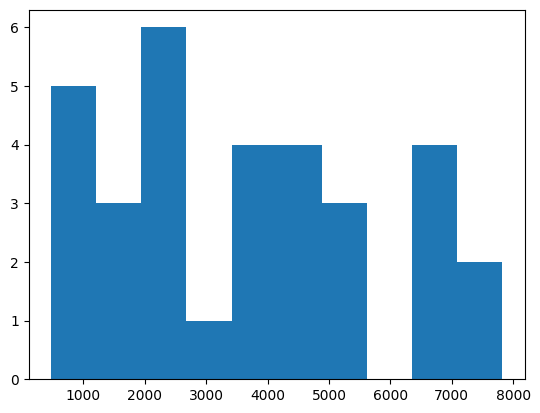

In [48]:
plt.hist(nn.init.trunc_normal_(torch.empty(32),a=0.,b=0.5).numpy()*16000)

(array([5., 4., 3., 2., 1., 2., 4., 2., 3., 6.]),
 array([  43.29538345,  812.54699707, 1581.79858398, 2351.05029297,
        3120.30175781, 3889.5534668 , 4658.80517578, 5428.05664062,
        6197.30810547, 6966.56005859, 7735.81152344]),
 <BarContainer object of 10 artists>)

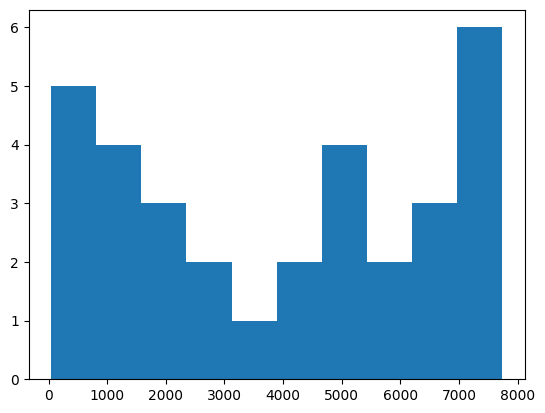

In [56]:
plt.hist(nn.init.uniform_(torch.empty(32),a=0.,b=0.5).numpy()*16000)

In [60]:
os.getcwd()

'/Users/linh/projects/IConNet'

In [61]:
from IConNet.signal import to_hz, to_mel

In [64]:
to_mel(Tensor([50]))

tensor([77.7545])

In [65]:
import numpy as np

In [70]:
def to_mel(hz):
    return 2595 * np.log10(1 + hz / 700)

def to_hz(mel):
    return 700 * (np.power(10, mel / 2595) - 1)

In [71]:
out_channels = 32
sample_rate = 16000
min_low_hz = 50
min_band_hz = 2
low_hz = min_low_hz
high_hz = sample_rate / 2 - (min_low_hz + min_band_hz)

mel = np.linspace(to_mel(low_hz),
                  to_mel(high_hz),
                  out_channels + 1)
hz = to_hz(mel) / sample_rate

In [72]:
hz

array([0.003125  , 0.00684694, 0.0108644 , 0.01520086, 0.01988164,
       0.02493407, 0.03038768, 0.03627431, 0.04262835, 0.0494869 ,
       0.05689004, 0.06488099, 0.07350644, 0.08281675, 0.09286632,
       0.10371384, 0.11542267, 0.12806119, 0.14170323, 0.15642846,
       0.1723229 , 0.18947937, 0.20799809, 0.22798723, 0.24956353,
       0.27285301, 0.29799172, 0.32512646, 0.35441575, 0.38603064,
       0.42015579, 0.45699053, 0.49675   ])

In [73]:
band_hz = np.diff(hz)
band_hz

array([0.00372194, 0.00401746, 0.00433646, 0.00468078, 0.00505244,
       0.00545361, 0.00588663, 0.00635404, 0.00685856, 0.00740313,
       0.00799095, 0.00862545, 0.00931032, 0.01004957, 0.01084752,
       0.01170883, 0.01263852, 0.01364204, 0.01472523, 0.01589444,
       0.01715648, 0.01851872, 0.01998913, 0.0215763 , 0.02328949,
       0.0251387 , 0.02713475, 0.02928928, 0.03161489, 0.03412516,
       0.03683474, 0.03975947])

(array([10.,  5.,  4.,  3.,  3.,  2.,  1.,  2.,  1.,  2.]),
 array([0.003125 , 0.0524875, 0.10185  , 0.1512125, 0.200575 , 0.2499375,
        0.2993   , 0.3486625, 0.398025 , 0.4473875, 0.49675  ]),
 <BarContainer object of 10 artists>)

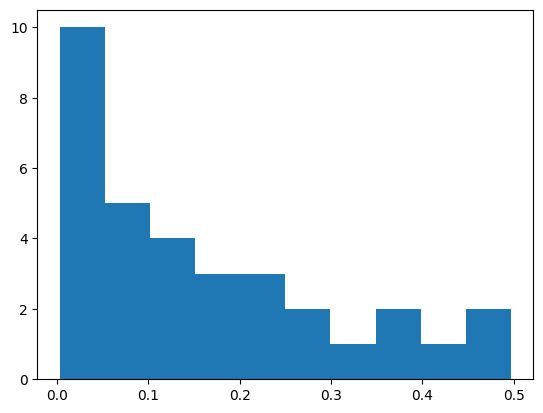

In [75]:
plt.hist(hz)

(array([1., 2., 2., 5., 5., 8., 5., 2., 0., 2.]),
 array([0.04241655, 0.05882604, 0.07523552, 0.09164501, 0.1080545 ,
        0.12446399, 0.14087348, 0.15728296, 0.17369245, 0.19010194,
        0.20651142]),
 <BarContainer object of 10 artists>)

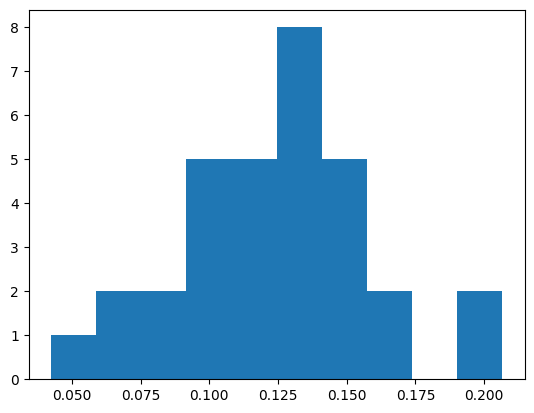

In [129]:
plt.hist(torch.empty(32).log_normal_(mean=0.1, std=0.4).numpy()/10)

In [132]:
torch.empty(32).uniform_()

tensor([9.4648e-02, 3.2258e-01, 1.3488e-01, 9.7342e-01, 4.4284e-01, 9.0430e-02,
        7.4464e-01, 7.7455e-01, 1.4501e-01, 3.1473e-01, 8.1513e-01, 5.6680e-01,
        8.0094e-01, 5.6036e-01, 6.1740e-01, 4.4528e-01, 4.7264e-01, 5.8345e-02,
        6.2354e-01, 8.3682e-01, 1.5577e-01, 9.9023e-01, 5.7312e-01, 7.3058e-01,
        8.1728e-01, 9.0217e-01, 9.1146e-01, 8.0734e-04, 9.7621e-01, 1.4890e-01,
        9.7745e-01, 8.8766e-01])

(array([1., 1., 1., 3., 5., 6., 8., 1., 5., 1.]),
 array([-2.13080978, -1.7517246 , -1.37263954, -0.99355435, -0.61446917,
        -0.23538405,  0.14370111,  0.52278626,  0.90187138,  1.28095651,
         1.66004169]),
 <BarContainer object of 10 artists>)

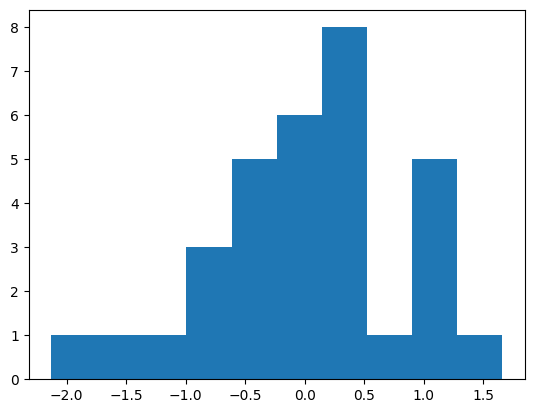

In [100]:
plt.hist(torch.empty(32).normal_(mean=0.1, std=0.8).numpy())

In [125]:
m = torch.distributions.laplace.Laplace(torch.tensor([0.5]), torch.tensor([1.]))
for m.sample()

TypeError: 'int' object is not iterable

In [140]:
torch.gt(torch.tensor([5,7,11]),10)

tensor([False, False,  True])

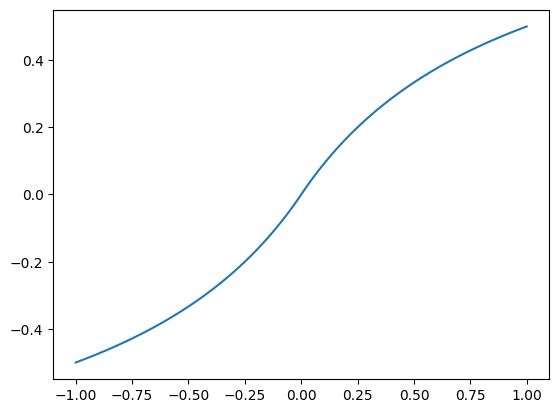

In [142]:
xx = torch.linspace(-1,1,100)
yy = F.softsign(xx)
plt.plot(xx.numpy(), yy.numpy())

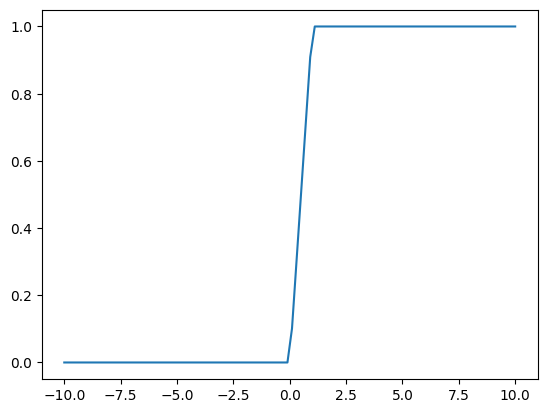

In [146]:
xx = torch.linspace(-10,10,100)
yy = torch.minimum(torch.maximum(xx,torch.zeros_like(xx)), torch.ones_like(xx))
plt.plot(xx.numpy(), yy.numpy())

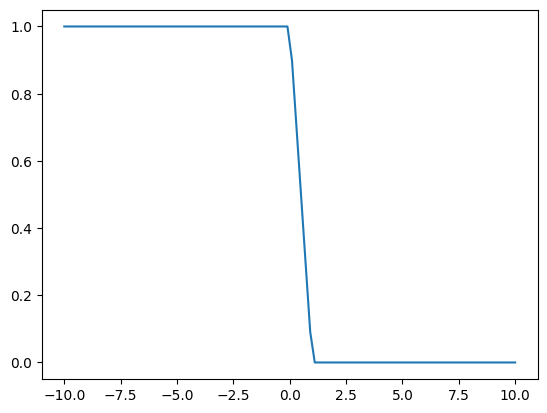

In [147]:
xx = torch.linspace(-10,10,100)
yy = 1 - torch.minimum(torch.maximum(xx,torch.zeros_like(xx)), torch.ones_like(xx))
plt.plot(xx.numpy(), yy.numpy())

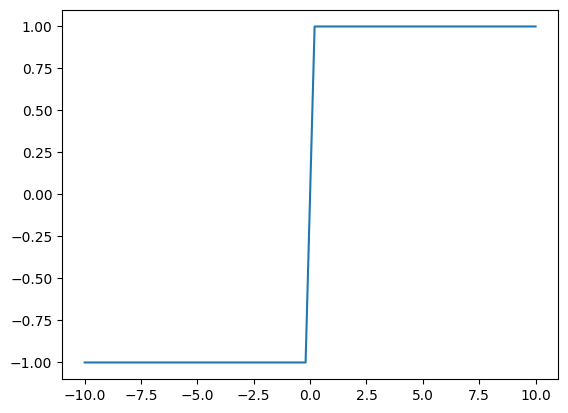

In [191]:
xx = torch.linspace(-10,10,101)
yy = torch.tanh(xx/(xx.abs()+1e-12)*100)
plt.plot(xx.numpy(), yy.numpy())

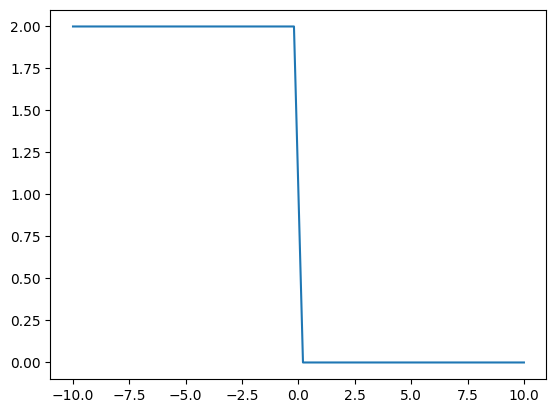

In [192]:
xx = torch.linspace(-10,10,101)
yy = 1-torch.tanh(xx/(xx.abs()+1e-12)*100)
plt.plot(xx.numpy(), yy.numpy())

In [157]:
yy[torch.where(xx==0,True,False)]

tensor([2.7183])

In [158]:
import math

In [188]:
math.tanh(-0.1/(0.1)*100)

-1.0

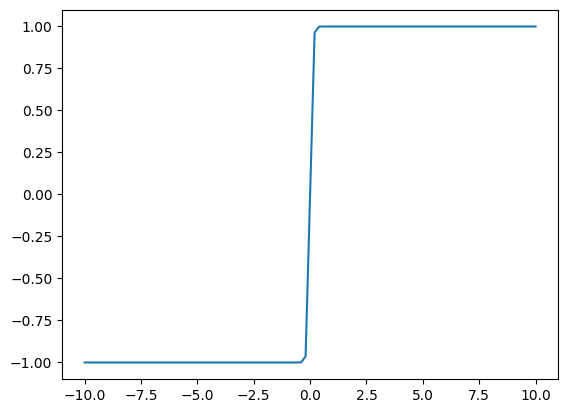

In [180]:
xx = torch.linspace(-10,10,101)
yy = torch.tanh(xx*10)
plt.plot(xx.numpy(), yy.numpy())